# Python Image Processing

**Developer:** Mark Trombly

**Course:** Artificial Intelligence Applications

**Semester:** Summer 2025

**Program Requirements:**

1. Get data
2. Prepare data
3. Display data
4. **In each of the following examples, research functions/properties/options indicated below.**


In [1]:
import cv2 # image and video processing library (note: cv2 is module import name for opencv-python)
import numpy as np # all things "numbers and Python" (used here for its array functionality)
import matplotlib.pyplot as plt # display plots, or frames from video or images

# OpenCV: Open-source library for computer vision, machine learning, and image processing. (https://opencv.org/)
# Note: All OpenCV array structures are converted to and from Numpy arrays.
# Numpy interation facilitates use with other libraries that use Numpy, like SciPy, Matplotlib, and scikit-Learn (aka "sklearn").


**Note: ALL** work **MUST** be done within a Python **_environment._**

**IF** incurring **ANY** errors--**RESEARCH YOUR OWN SOLUTIONS BEFORE SEEKING ASSISTANCE!**

**FINDING YOUR OWN SOLUTIONS IS WHAT WILL MAKE YOU SUCCESSFUL--$$$!**

**_UNLESS_** I indicate otherwise, do **NOT** use the "pip" package manager for **_ANY_** installations!

**IF** errors still exist, **first**, seek assistance from your colleagues to see if they found a solution!

# Basic OPenCV Commands:

1. Read image from file **(imread)**
2. Display image in OpenCV window **(imshow)**
3. Write image to file **(imwrite)**

# Get image -imread()

In [2]:
# https://pythonprogramming.net/loading-images-python-opencv-tutorial/
# https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html
# https://note.nkmk.me/en/python-opencv-imread-imwrite/

# place file in same directory as .ipynb file
img = cv2.imread('watch.jpg')

# img = cv2.imread('watch.jpg', cv2.IMREAD_UNCHANGED)

# Note: 2nd argument optional, specifies one of three available formats:

# IMREAD_COLOR: Loads image in BGR 8-bit format (default).
# IMREAD_UNCHANGED: Loads image as is (including alpha channel, if present)
# IMREAD_GRAYSCALE: Loads image as an intensity one(1).

# check if image found 
if img is None:
    print("Check file path!")

# Get image info

In [3]:
print(type(img))
# <class 'numpy.ndarray'>

print(img.shape)
# (168, 300, 3)

# Note: Difference between type and dtype:
# https://stackoverflow.com/questions/27780878/python-confustion-between-types-and-dtypes
print(img.dtype)
# uint8

<class 'numpy.ndarray'>
(168, 300, 3)
uint8


In [4]:
# More info
# https://www.tutorialkart.com/opencv/python/opencv-python-get-image-size/

# image dimensions
dimensions = img.shape

# get image height, width, number of channels
# Note: Number of Channels = 4 represent Alpha, Red, Green and Blue channels.
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print('Image Dimension      : ', dimensions)
print('Image Height         : ', height)
print('Image Width          : ', width)
print('Number of Channels   : ', channels)

Image Dimension      :  (168, 300, 3)
Image Height         :  168
Image Width          :  300
Number of Channels   :  3


# Show image - imshow()

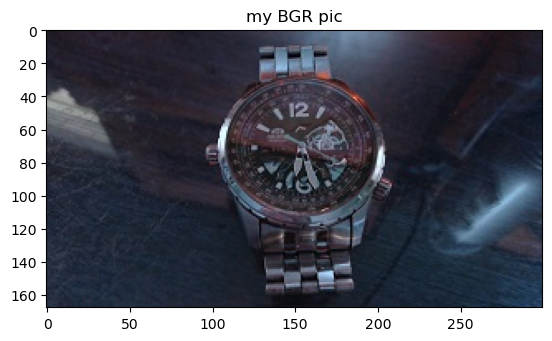

In [5]:
# display inside of Jupyter Notebook cell
# Note: Matplot lib expects img in RGB format but OpenCV provides it in BGR format!
plt.imshow(img)
plt.title('my BGR pic')
plt.show()

# can also display in separate window
# cv2.imshow('my BGR pic', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Image Conversions

In [6]:
# OpenCV contains more than 150 color-space conversion functions
# print all of them! Uncomment two lines below.

# flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
# print(flags)

# Note: HSV: hue range is [0,179], saturation range is [0,255], and value range is [0,255].
# Different software use different scales. When comparing OpenCV values with other software vales, need to normalize these ranges!

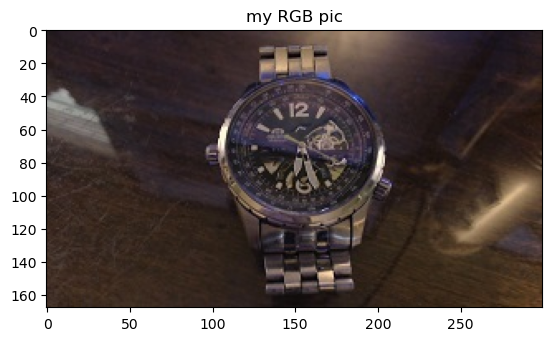

In [7]:
# convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Or, view another conversion
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb)
plt.title('my RGB pic')
plt.show()

# Save image - imwrite()

In [8]:
# after manipulating images, save them!
# Note: JPEG is lossy compression, even at highest quality (100)!
# Save original image with no resolution loss, as PNG or BMP!
cv2.imwrite('watch_new.png', img)

True

# More Image Processing!

In [9]:
# https://badriadhikari.github.io/dl-workshop-2022/an-image-is-simply-a-matrix.html
myimg = cv2.imread('cat-grayscale.jpg')

# Enlarging image: Use INTER_LINEAR or INTER_CUBIC interpolation
# Shrinking image: Use INTER_AREA interpolation
# Note: Cubic interpolation: Computationally more complex, that is, slower than linear interpolation.
# However, quality of resulting image will be higer.
# https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#go47a974

resized = cv2.resize(myimg, (128, 128), interpolation = cv2.INTER_AREA) # Here, shrinking image.
mynewimg = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) # Returns Numpy array (2-dimensional array)!

# Get image info

In [10]:
# Note: Binary images and grayscal images are 2-dimensional arrays!
# 1st dim = rows (height); 2nd dim cols (width)

print(mynewimg.shape) # Here, both rows and cols have 128 elements

print(type(mynewimg)) # type() function returns Numpy ndarray

print(type(mynewimg.shape)) # However, when used with shape attribute, returns tuple of dimensions (2)

# Here: height =128; width = 128 (since it is grayscale there is *no* 3rd dimension!)
# In a "true-color" image, 2rd dimensionis a color plane, such as RGB (Red, Green, Blue), or HSV, or CMYK.

(128, 128)
<class 'numpy.ndarray'>
<class 'tuple'>


In [11]:
# Display numpy array's contents
print(mynewimg[:15, :15]) # return 1st 15 rows and 1st 15 cols

[[149 155 163 172 178 183 186 187 187 184 181 176 173 172 172]
 [144 153 163 172 180 184 187 188 187 182 178 174 170 170 171]
 [146 155 164 173 181 185 187 187 185 183 177 173 170 170 171]
 [149 158 168 176 183 186 187 187 185 180 176 178 187 186 181]
 [156 163 171 177 183 186 187 184 182 179 186 206 196 189 194]
 [160 167 174 180 183 185 185 183 180 182 206 176 131 129 135]
 [168 173 179 183 185 184 183 181 177 187 202 141 148 143 147]
 [174 178 184 186 187 184 180 177 174 189 184 130 145 160 168]
 [179 183 186 188 188 184 179 174 174 201 159 143 157 166 175]
 [184 187 188 189 187 183 177 174 174 194 146 147 174 198 202]
 [188 190 192 190 187 182 177 173 176 195 149 152 181 202 207]
 [190 192 194 191 187 182 177 174 179 205 161 164 192 210 215]
 [192 193 191 189 186 181 178 177 183 208 171 172 203 214 217]
 [194 193 191 187 184 180 177 178 185 206 171 172 202 218 223]
 [194 193 190 186 181 178 176 179 189 206 166 175 206 221 221]]


# Display image -imshow()

(128, 128)


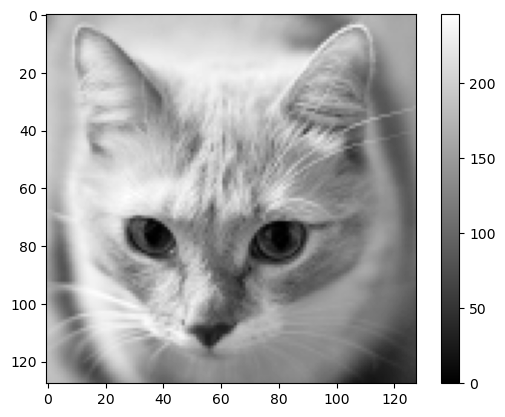

In [12]:
# Display numpy array as grayscale image (set up colormapping)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
print(mynewimg.shape)
plt.imshow(mynewimg, cmap='gray')
plt.colorbar() # Note: Colorbars are visualizations of mapping from scalar values to colors
plt.show()

# Save Image Data - as text file

In [13]:
# Numpy savetxt() function: Saves Numpy array to text file
np.savetxt('mycat.csv', mynewimg, fmt='%.1f', delimiter =',')